### Questions to address:
    1. What type of restaurants do the majority of the customers order from?
    2. How many votes has each of type of restaurant received from customers?
    3. What are the ratings has the majority of the restaurants have received?
    4. Zomato has observed most couples order online. What is their avg spending on each order?
    5. Which mode (online/offline) has recieved maximum ratings?
    6. Which type of restaurants received more offline orders, so that Zomato can provide customers with offers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./ZomatoData.csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.shape

(148, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [7]:
def removeDenominator(val):
    val=val[:3]
    return float(val)

In [8]:
df['rate']=df['rate'].apply(removeDenominator)

### Another way to get the rating

### def getRating(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(getRating)

In [30]:
offline_orders.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
13,Caf-Eleven,No,No,4.0,424,450,Cafes
18,T3H Cafe,No,No,3.9,93,300,Cafes


In [30]:
offline_orders.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
13,Caf-Eleven,No,No,4.0,424,450,Cafes
18,T3H Cafe,No,No,3.9,93,300,Cafes


In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Ans 1: Type of restaurants majority of the customers order from

In [11]:
df['listed_in(type)'].value_counts()

Dining    110
Cafes      23
other       8
Buffet      7
Name: listed_in(type), dtype: int64

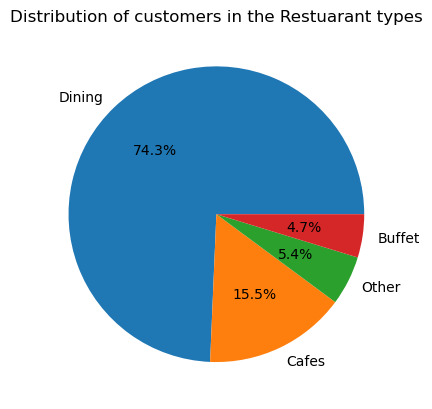

In [12]:
labels=['Dining', 'Cafes', 'Other', 'Buffet']
plt.pie(df['listed_in(type)'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title("Distribution of customers in the Restuarant types")
plt.show()

### Ans 2: Votes each type of restaurant received from the customers

In [13]:
votes_count=df.groupby(['listed_in(type)'], as_index=False).agg({'votes': 'sum'}).sort_values(by='votes', ascending=True)
votes_count

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
3,other,9367
2,Dining,20363


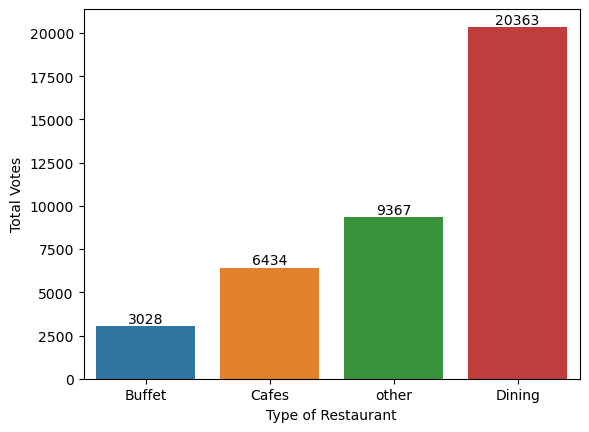

In [14]:
ax=sns.barplot(x='listed_in(type)', y='votes', data=votes_count)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.show()

### Ans 3: What are the ratings majority of the restaurants have received

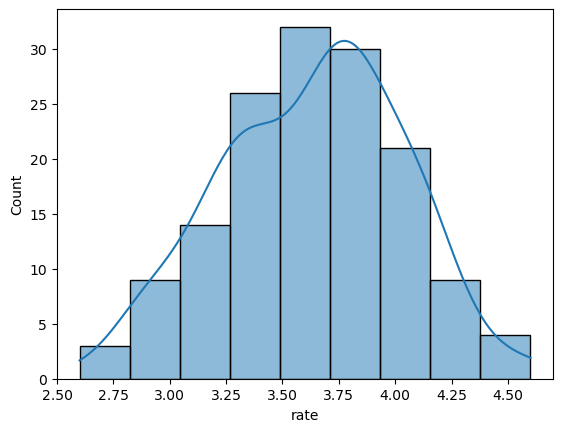

In [32]:
sns.histplot(x='rate', data=df, kde=True)
plt.show()

### Ans 4: Average spending of customers who order online

In [16]:
order_online=df[df['online_order']=='Yes']

In [17]:
order_online.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes


In [18]:
avg_spending=df['approx_cost(for two people)'].mean()
print("Average Spending of couple", round(avg_spending, 2))

Average Spending of couple 418.24


### Ans 5: The mode (online/offline) that received maximum rating

In [19]:
online_max_rating=df[df['online_order']=='Yes']['rate'].max()
offline_max_rating=df[df['online_order']=='No']['rate'].max()
print("Maximum online rating:", online_max_rating)
print("Maximum offline rating:", offline_max_rating)

Maximum online rating: 4.6
Maximum offline rating: 4.3


In [20]:
online_avg_rating=df[df['online_order']=='Yes']['rate'].mean()
offline_avg_rating=df[df['online_order']=='No']['rate'].mean()
print("Average online Rating:", round(online_avg_rating, 2))
print("Average offline Rating:", round(offline_avg_rating, 2))

Average online Rating: 3.86
Average offline Rating: 3.49


In [24]:
offline_orders=df[df['online_order']=='No']

In [31]:
offline_orders.groupby(['listed_in(type)'], as_index=False).agg({'votes': 'count'}).sort_values(by='votes', ascending=False)

,listed_in(type),votes
2,Dining,77
1,Cafes,8
0,Buffet,3
3,other,2
